In [1]:
!pip install matplotlib


In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import re

In [3]:
densityLink = 'https://visaguide.world/asia/'
gdpLink = 'https://en.wikipedia.org/wiki/List_of_Asian_countries_by_GDP'

In [4]:
densityResponse = requests.get(densityLink)
densityResponse

<Response [200]>

In [5]:
densitySoup = BeautifulSoup(densityResponse.text,'html.parser')
densitySoup

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">
<style>img:is([sizes="auto" i], [sizes^="auto," i]) { contain-intrinsic-size: 3000px 1500px }</style>
<!-- This site is optimized with the Yoast SEO plugin v24.2 - https://yoast.com/wordpress/plugins/seo/ -->
<title>List of Countries in Asia - VisaGuide.World</title><link as="image" data-rocket-preload="" fetchpriority="high" href="https://visaguide.world/wp-content/uploads/2023/01/Visa-Guide-World.svg" rel="preload"/><link as="style" data-rocket-preload="" href="https://fonts.googleapis.com/css?family=Roboto%3A300%2C400%2C500&amp;display=swap" rel="preload"><link href="https://fonts.googleapis.com/css?family=Roboto%3A300%2C400%2C500&amp;display=swap" media="print" onload="this.media='all'" r

In [6]:
densityTables = densitySoup.find_all('table')
densityTables

[<table>
 <tbody>
 <tr>
 <td>Area</td>
 <td>44.57 million km²</td>
 </tr>
 <tr>
 <td>Number of countries</td>
 <td>51 (49 recognized by the UN)</td>
 </tr>
 <tr>
 <td>Population</td>
 <td>4.561 billion</td>
 </tr>
 <tr>
 <td>Number of languages spoken</td>
 <td>2,300 languages across the continent</td>
 </tr>
 <tr>
 <td>Biggest country (by area)</td>
 <td>China (9.6 million km²)</td>
 </tr>
 <tr>
 <td>Most populated country</td>
 <td>China (1.4 billion)</td>
 </tr>
 <tr>
 <td>Highest mountain</td>
 <td>Mount Everest</td>
 </tr>
 <tr>
 <td>Longest river</td>
 <td>Yangtze (Cháng Jiāng) in China</td>
 </tr>
 <tr>
 <td>Largest lake</td>
 <td>Baikal Lake in Russia</td>
 </tr>
 </tbody>
 </table>,
 <table>
 <thead>
 <tr>
 <th>Country</th>
 <th>Capital</th>
 <th>Area km2</th>
 <th>Population (2021)</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>Afghanistan</td>
 <td>Kabul</td>
 <td>652,864</td>
 <td>39,835,428</td>
 </tr>
 <tr>
 <td>Armenia</td>
 <td>Yerevan</td>
 <td>29,743</td>
 <td>2,968,127</t

In [7]:
densityTables[1]

<table>
<thead>
<tr>
<th>Country</th>
<th>Capital</th>
<th>Area km2</th>
<th>Population (2021)</th>
</tr>
</thead>
<tbody>
<tr>
<td>Afghanistan</td>
<td>Kabul</td>
<td>652,864</td>
<td>39,835,428</td>
</tr>
<tr>
<td>Armenia</td>
<td>Yerevan</td>
<td>29,743</td>
<td>2,968,127</td>
</tr>
<tr>
<td>Azerbaijan</td>
<td>Baku</td>
<td>86,600</td>
<td>10,223,342</td>
</tr>
<tr>
<td>Bahrain</td>
<td>Manama</td>
<td>760</td>
<td>1,748,296</td>
</tr>
<tr>
<td>Bangladesh</td>
<td>Dhaka</td>
<td>147,570</td>
<td>166,303,498</td>
</tr>
<tr>
<td>Bhutan</td>
<td>Thimphu</td>
<td>38,394</td>
<td>779,898</td>
</tr>
<tr>
<td>Brunei</td>
<td>Bandar Seri Begawan</td>
<td>5,765</td>
<td>441,532</td>
</tr>
<tr>
<td>Cambodia</td>
<td>Phnom Penh</td>
<td>181,035</td>
<td>16,946,438</td>
</tr>
<tr>
<td>China (PRC)</td>
<td>Beijing</td>
<td>9,596,961</td>
<td>1,444,216,107</td>
</tr>
<tr>
<td>East Timor</td>
<td>Dili</td>
<td>14,874</td>
<td>1,343,873</td>
</tr>
<tr>
<td>Georgia</td>
<td>Tbilisi</td>
<td>69,700<

In [8]:
len(densityTables)

3

In [9]:
densityHeaders = densityTables[1].find_all('th')

In [10]:
densityHeaders

[<th>Country</th>,
 <th>Capital</th>,
 <th>Area km2</th>,
 <th>Population (2021)</th>]

In [11]:
densityRows = densityTables[1].find_all('td')

In [12]:
densityRows

[<td>Afghanistan</td>,
 <td>Kabul</td>,
 <td>652,864</td>,
 <td>39,835,428</td>,
 <td>Armenia</td>,
 <td>Yerevan</td>,
 <td>29,743</td>,
 <td>2,968,127</td>,
 <td>Azerbaijan</td>,
 <td>Baku</td>,
 <td>86,600</td>,
 <td>10,223,342</td>,
 <td>Bahrain</td>,
 <td>Manama</td>,
 <td>760</td>,
 <td>1,748,296</td>,
 <td>Bangladesh</td>,
 <td>Dhaka</td>,
 <td>147,570</td>,
 <td>166,303,498</td>,
 <td>Bhutan</td>,
 <td>Thimphu</td>,
 <td>38,394</td>,
 <td>779,898</td>,
 <td>Brunei</td>,
 <td>Bandar Seri Begawan</td>,
 <td>5,765</td>,
 <td>441,532</td>,
 <td>Cambodia</td>,
 <td>Phnom Penh</td>,
 <td>181,035</td>,
 <td>16,946,438</td>,
 <td>China (PRC)</td>,
 <td>Beijing</td>,
 <td>9,596,961</td>,
 <td>1,444,216,107</td>,
 <td>East Timor</td>,
 <td>Dili</td>,
 <td>14,874</td>,
 <td>1,343,873</td>,
 <td>Georgia</td>,
 <td>Tbilisi</td>,
 <td>69,700</td>,
 <td>3,979,765</td>,
 <td>Hong Kong</td>,
 <td>City of Victoria</td>,
 <td>2,755</td>,
 <td>7,552,810</td>,
 <td>India</td>,
 <td>New Delhi</td>,
 

In [13]:
densityHeaders = [head.text for head in densityHeaders]

In [14]:
densityHeaders

['Country', 'Capital', 'Area km2', 'Population (2021)']

In [15]:
densityRows = [row.text for row in densityRows]

In [16]:
densityRows

['Afghanistan',
 'Kabul',
 '652,864',
 '39,835,428',
 'Armenia',
 'Yerevan',
 '29,743',
 '2,968,127',
 'Azerbaijan',
 'Baku',
 '86,600',
 '10,223,342',
 'Bahrain',
 'Manama',
 '760',
 '1,748,296',
 'Bangladesh',
 'Dhaka',
 '147,570',
 '166,303,498',
 'Bhutan',
 'Thimphu',
 '38,394',
 '779,898',
 'Brunei',
 'Bandar Seri Begawan',
 '5,765',
 '441,532',
 'Cambodia',
 'Phnom Penh',
 '181,035',
 '16,946,438',
 'China (PRC)',
 'Beijing',
 '9,596,961',
 '1,444,216,107',
 'East Timor',
 'Dili',
 '14,874',
 '1,343,873',
 'Georgia',
 'Tbilisi',
 '69,700',
 '3,979,765',
 'Hong Kong',
 'City of Victoria',
 '2,755',
 '7,552,810',
 'India',
 'New Delhi',
 '3,287,263',
 '1,393,409,038',
 'Indonesia',
 'Jakarta',
 '1,904,569',
 '276,361,783',
 'Iran',
 'Tehran',
 '1,648,195',
 '85,028,759',
 'Iraq',
 'Baghdad',
 '438,317',
 '41,179,350',
 'Israel',
 'Jerusalem (disputed)',
 '20,770',
 '8,789,774',
 'Japan',
 'Tokyo',
 '377,915',
 '126,050,804',
 'Jordan',
 'Amman',
 '89,342',
 '10,269,021',
 'Kazakhst

In [17]:
D={}
start=0
for head in densityHeaders:
    D[head]=[densityRows[i] for i in range(start,len(densityRows),len(densityHeaders))]
    start+=1
for i,j in D.items():
    print(f'{i}:{j}')

Country:['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China (PRC)', 'East Timor', 'Georgia', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Macau', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'The Philippines', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']
Capital:['Kabul', 'Yerevan', 'Baku', 'Manama', 'Dhaka', 'Thimphu', 'Bandar Seri Begawan', 'Phnom Penh', 'Beijing', 'Dili', 'Tbilisi', 'City of Victoria', 'New Delhi', 'Jakarta', 'Tehran', 'Baghdad', 'Jerusalem (disputed)', 'Tokyo', 'Amman', 'Nur-Sultan', 'Kuwait City', 'Bishkek', 'Vientiane', 'Beirut', 'Macau', 'Kuala Lumpur', 'Malé', 'Ulaanbaatar', 'Naypyidaw', 'Kathmandu', 'P

In [18]:
densityDf = pd.DataFrame(D)
densityDf.index=range(1,len(densityDf)+1)
densityDf

,Country,Capital,Area km2,Population (2021)
1,Afghanistan,Kabul,"652,864","39,835,428"
2,Armenia,Yerevan,"29,743","2,968,127"
3,Azerbaijan,Baku,"86,600","10,223,342"
4,Bahrain,Manama,760,"1,748,296"
5,Bangladesh,Dhaka,"147,570","166,303,498"
6,Bhutan,Thimphu,"38,394","779,898"
7,Brunei,Bandar Seri Begawan,"5,765","441,532"
8,Cambodia,Phnom Penh,"181,035","16,946,438"
9,China (PRC),Beijing,"9,596,961","1,444,216,107"
10,East Timor,Dili,"14,874","1,343,873"


In [19]:
densityDf.index=range(1,len(densityDf)+1)
densityDf

,Country,Capital,Area km2,Population (2021)
1,Afghanistan,Kabul,"652,864","39,835,428"
2,Armenia,Yerevan,"29,743","2,968,127"
3,Azerbaijan,Baku,"86,600","10,223,342"
4,Bahrain,Manama,760,"1,748,296"
5,Bangladesh,Dhaka,"147,570","166,303,498"
6,Bhutan,Thimphu,"38,394","779,898"
7,Brunei,Bandar Seri Begawan,"5,765","441,532"
8,Cambodia,Phnom Penh,"181,035","16,946,438"
9,China (PRC),Beijing,"9,596,961","1,444,216,107"
10,East Timor,Dili,"14,874","1,343,873"


In [20]:
densityDf['Population (2021)']=densityDf['Population (2021)'].str.replace(',','').astype(int)
densityDf

,Country,Capital,Area km2,Population (2021)
1,Afghanistan,Kabul,"652,864",39835428
2,Armenia,Yerevan,"29,743",2968127
3,Azerbaijan,Baku,"86,600",10223342
4,Bahrain,Manama,760,1748296
5,Bangladesh,Dhaka,"147,570",166303498
6,Bhutan,Thimphu,"38,394",779898
7,Brunei,Bandar Seri Begawan,"5,765",441532
8,Cambodia,Phnom Penh,"181,035",16946438
9,China (PRC),Beijing,"9,596,961",1444216107
10,East Timor,Dili,"14,874",1343873


In [21]:
gdpResponse = requests.get(gdpLink)
gdpResponse

<Response [200]>

In [22]:
gdpSoup = BeautifulSoup(gdpResponse.text,'html.parser')
gdpSoup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of Asian countries by GDP - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-e

In [23]:
gdpTable = gdpSoup.find_all('table')
gdpTable

[<table class="wikitable">
 <tbody><tr>
 <th>Region<br/>rank
 </th>
 <th>Country/Territory
 </th>
 <th>2024 GDP (nominal) in billions
 </th></tr>
 <tr>
 <td>—
 </td>
 <td><b><a href="/wiki/Asia" title="Asia">Asia</a></b>
 </td>
 <td><b>42.72 trillion</b>
 </td></tr>
 <tr>
 <td>1
 </td>
 <td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/23px-Flag_of_the_People%27s_Republic_of_China.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/35px-Flag_of_the_People%27s_Republic_of_China.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/45px-Flag_of_the_People%27s_Republic_of_China.svg.png 2x" width="23"/></span></span> </span><a href="/w

In [24]:
len(gdpTable)

2

In [25]:
gdpTable[0]

<table class="wikitable">
<tbody><tr>
<th>Region<br/>rank
</th>
<th>Country/Territory
</th>
<th>2024 GDP (nominal) in billions
</th></tr>
<tr>
<td>—
</td>
<td><b><a href="/wiki/Asia" title="Asia">Asia</a></b>
</td>
<td><b>42.72 trillion</b>
</td></tr>
<tr>
<td>1
</td>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/23px-Flag_of_the_People%27s_Republic_of_China.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/35px-Flag_of_the_People%27s_Republic_of_China.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/45px-Flag_of_the_People%27s_Republic_of_China.svg.png 2x" width="23"/></span></span> </span><a href="/wiki/China" title="C

In [26]:
gdpHeaders = gdpTable[0].find_all('th')
gdpHeaders

[<th>Region<br/>rank
 </th>,
 <th>Country/Territory
 </th>,
 <th>2024 GDP (nominal) in billions
 </th>]

In [27]:
gdpRows =gdpTable[0].find_all('td')
gdpRows


[<td>—
 </td>,
 <td><b><a href="/wiki/Asia" title="Asia">Asia</a></b>
 </td>,
 <td><b>42.72 trillion</b>
 </td>,
 <td>1
 </td>,
 <td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/23px-Flag_of_the_People%27s_Republic_of_China.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/35px-Flag_of_the_People%27s_Republic_of_China.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/45px-Flag_of_the_People%27s_Republic_of_China.svg.png 2x" width="23"/></span></span> </span><a href="/wiki/China" title="China">China</a>
 </td>,
 <td>18.53  trillion<sup class="reference" id="cite_ref-2"><a href="#cite_note-2"><span class="cite-bracket">[</span

In [28]:
gdpHeaders = [head.text.strip() for head in gdpHeaders]
gdpHeaders

['Regionrank', 'Country/Territory', '2024 GDP (nominal) in billions']

In [29]:
gdpRows = [row.text.strip() for row in gdpRows]
gdpRows

['—',
 'Asia',
 '42.72 trillion',
 '1',
 'China',
 '18.53  trillion[2]',
 '2',
 'Japan',
 '4.07  trillion[3]',
 '3',
 'India',
 '3.88  trillion[4]',
 '4',
 'Russia',
 '2.0 trillion',
 '5',
 'South Korea',
 '1.76 trillion',
 '6',
 'Indonesia',
 '1.47  trillion',
 '7',
 'Turkey',
 '1.3 trillion',
 '8',
 'Saudi Arabia',
 '1.11  trillion',
 '9',
 'Taiwan',
 '803.0 billion',
 '10',
 'Thailand',
 '548.9 billion',
 '11',
 'Israel',
 '530.6 billion',
 '12',
 'United Arab Emirates',
 '527.8 billion',
 '13',
 'Singapore',
 '525.2 billion',
 '14',
 'Philippines',
 '471.5 billion',
 '15',
 'Vietnam',
 '465.8 billion',
 '16',
 'Bangladesh',
 '451.16 billion',
 '17',
 'Malaysia',
 '445.5 billion',
 '18',
 'Iran',
 '434.8 billion',
 '19',
 'Hong Kong\n(SAR)',
 '401.5 billion',
 '20',
 'Pakistan',
 '374.6 billion',
 '21',
 'Kazakhstan',
 '292.8 billion',
 '22',
 'Iraq',
 '265.6 billion',
 '23',
 'Qatar',
 '223.3 billion',
 '24',
 'Kuwait',
 '184.8 billion',
 '25',
 'Oman',
 '114.7 billion',
 '26',
 'U

In [30]:
finalGdpRows = gdpRows[3:]
finalGdpRows

['1',
 'China',
 '18.53  trillion[2]',
 '2',
 'Japan',
 '4.07  trillion[3]',
 '3',
 'India',
 '3.88  trillion[4]',
 '4',
 'Russia',
 '2.0 trillion',
 '5',
 'South Korea',
 '1.76 trillion',
 '6',
 'Indonesia',
 '1.47  trillion',
 '7',
 'Turkey',
 '1.3 trillion',
 '8',
 'Saudi Arabia',
 '1.11  trillion',
 '9',
 'Taiwan',
 '803.0 billion',
 '10',
 'Thailand',
 '548.9 billion',
 '11',
 'Israel',
 '530.6 billion',
 '12',
 'United Arab Emirates',
 '527.8 billion',
 '13',
 'Singapore',
 '525.2 billion',
 '14',
 'Philippines',
 '471.5 billion',
 '15',
 'Vietnam',
 '465.8 billion',
 '16',
 'Bangladesh',
 '451.16 billion',
 '17',
 'Malaysia',
 '445.5 billion',
 '18',
 'Iran',
 '434.8 billion',
 '19',
 'Hong Kong\n(SAR)',
 '401.5 billion',
 '20',
 'Pakistan',
 '374.6 billion',
 '21',
 'Kazakhstan',
 '292.8 billion',
 '22',
 'Iraq',
 '265.6 billion',
 '23',
 'Qatar',
 '223.3 billion',
 '24',
 'Kuwait',
 '184.8 billion',
 '25',
 'Oman',
 '114.7 billion',
 '26',
 'Uzbekistan',
 '101.8 billion',
 '27

In [31]:
gdpD={}
st=0
for i in gdpHeaders:
    gdpD[i] = [finalGdpRows[i] for i in range(st,len(finalGdpRows),len(gdpHeaders))]
    st+=1
for i,j in gdpD.items():
    print(f'{i}:{j}')


Regionrank:['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']
Country/Territory:['China', 'Japan', 'India', 'Russia', 'South Korea', 'Indonesia', 'Turkey', 'Saudi Arabia', 'Taiwan', 'Thailand', 'Israel', 'United Arab Emirates', 'Singapore', 'Philippines', 'Vietnam', 'Bangladesh', 'Malaysia', 'Iran', 'Hong Kong\n(SAR)', 'Pakistan', 'Kazakhstan', 'Iraq', 'Qatar', 'Kuwait', 'Oman', 'Uzbekistan', 'Turkmenistan', 'Sri Lanka', 'Azerbaijan', 'Myanmar', 'Macau\n(SAR)', 'Jordan', 'Bahrain', 'Nepal', 'Cambodia', 'Lebanon', 'Cyprus', 'Georgia', 'Armenia', 'North Korea', 'Syria', 'Mongolia', 'Palestine', 'Laos', 'Afghanistan', 'Yemen', 'Brunei', 'Kyrgyzstan', 'Tajikistan', 'Maldives', 'Bhutan', 'Timor-Leste']
2024 GDP (nominal) in billions:['18.53  

In [32]:
gdpDf=pd.DataFrame(gdpD)
gdpDf

,Regionrank,Country/Territory,2024 GDP (nominal) in billions
0,1,China,18.53 trillion[2]
1,2,Japan,4.07 trillion[3]
2,3,India,3.88 trillion[4]
3,4,Russia,2.0 trillion
4,5,South Korea,1.76 trillion
5,6,Indonesia,1.47 trillion
6,7,Turkey,1.3 trillion
7,8,Saudi Arabia,1.11 trillion
8,9,Taiwan,803.0 billion
9,10,Thailand,548.9 billion


In [33]:
gdpDf.to_csv('gdpCsv.csv')

*17-02-25*

In [34]:
densityDf.columns

Index(['Country', 'Capital', 'Area km2', 'Population (2021)'], dtype='object')

In [35]:
gdpDf.columns

Index(['Regionrank', 'Country/Territory', '2024 GDP (nominal) in billions'], dtype='object')

In [36]:
gdpDf['Country']=gdpDf['Country/Territory']
gdpDf.drop(['Country/Territory'],axis=1)
gdpDf

,Regionrank,Country/Territory,2024 GDP (nominal) in billions,Country
0,1,China,18.53 trillion[2],China
1,2,Japan,4.07 trillion[3],Japan
2,3,India,3.88 trillion[4],India
3,4,Russia,2.0 trillion,Russia
4,5,South Korea,1.76 trillion,South Korea
5,6,Indonesia,1.47 trillion,Indonesia
6,7,Turkey,1.3 trillion,Turkey
7,8,Saudi Arabia,1.11 trillion,Saudi Arabia
8,9,Taiwan,803.0 billion,Taiwan
9,10,Thailand,548.9 billion,Thailand


In [37]:
densityDf['Population']=densityDf['Population (2021)']
densityDf

,Country,Capital,Area km2,Population (2021),Population
1,Afghanistan,Kabul,"652,864",39835428,39835428
2,Armenia,Yerevan,"29,743",2968127,2968127
3,Azerbaijan,Baku,"86,600",10223342,10223342
4,Bahrain,Manama,760,1748296,1748296
5,Bangladesh,Dhaka,"147,570",166303498,166303498
6,Bhutan,Thimphu,"38,394",779898,779898
7,Brunei,Bandar Seri Begawan,"5,765",441532,441532
8,Cambodia,Phnom Penh,"181,035",16946438,16946438
9,China (PRC),Beijing,"9,596,961",1444216107,1444216107
10,East Timor,Dili,"14,874",1343873,1343873


In [38]:
densityDf=densityDf.drop(['Population (2021)'],axis=1)
densityDf


,Country,Capital,Area km2,Population
1,Afghanistan,Kabul,"652,864",39835428
2,Armenia,Yerevan,"29,743",2968127
3,Azerbaijan,Baku,"86,600",10223342
4,Bahrain,Manama,760,1748296
5,Bangladesh,Dhaka,"147,570",166303498
6,Bhutan,Thimphu,"38,394",779898
7,Brunei,Bandar Seri Begawan,"5,765",441532
8,Cambodia,Phnom Penh,"181,035",16946438
9,China (PRC),Beijing,"9,596,961",1444216107
10,East Timor,Dili,"14,874",1343873


In [39]:

gdpDf['Country']=gdpDf['Country/Territory']
gdpDf['Gdp in billion']=gdpDf['2024 GDP (nominal) in billions']
gdpDf=gdpDf.drop(['Country/Territory','2024 GDP (nominal) in billions'],axis=1)
gdpDf

,Regionrank,Country,Gdp in billion
0,1,China,18.53 trillion[2]
1,2,Japan,4.07 trillion[3]
2,3,India,3.88 trillion[4]
3,4,Russia,2.0 trillion
4,5,South Korea,1.76 trillion
5,6,Indonesia,1.47 trillion
6,7,Turkey,1.3 trillion
7,8,Saudi Arabia,1.11 trillion
8,9,Taiwan,803.0 billion
9,10,Thailand,548.9 billion


In [40]:
finalDf = pd.merge(densityDf,gdpDf,on='Country',how='inner')
finalDf.index=range(1,len(finalDf)+1)
finalDf

,Country,Capital,Area km2,Population,Regionrank,Gdp in billion
1,Afghanistan,Kabul,"652,864",39835428,45,17.1 billion
2,Armenia,Yerevan,"29,743",2968127,39,27.5 billion
3,Azerbaijan,Baku,"86,600",10223342,29,80.9 billion
4,Bahrain,Manama,760,1748296,33,46.8 billion
5,Bangladesh,Dhaka,"147,570",166303498,16,451.16 billion
6,Bhutan,Thimphu,"38,394",779898,51,3.31 billion
7,Brunei,Bandar Seri Begawan,"5,765",441532,47,16.4 billion
8,Cambodia,Phnom Penh,"181,035",16946438,35,45.2 billion
9,Georgia,Tbilisi,"69,700",3979765,38,36.6 billion
10,India,New Delhi,"3,287,263",1393409038,3,3.88 trillion[4]


In [41]:
import re
def convertGdpToBillion(value):
  value = value.replace(',','').strip()
  value = re.sub(r'\[.*?\]','',value)

  if 'billion' in value:
    value=value.replace('billion','').strip()
    return float(value)
  elif 'trillion' in value:
    value=value.replace('trillion','').strip()
    return float(value)*1000
  elif 'million' in value:
    value = value.replace('million','').strip()
    return float(value)/1000

finalDf[' Final Gdp in billion']=finalDf['Gdp in billion'].apply(convertGdpToBillion)
finalDf

,Country,Capital,Area km2,Population,Regionrank,Gdp in billion,Final Gdp in billion
1,Afghanistan,Kabul,"652,864",39835428,45,17.1 billion,17.10
2,Armenia,Yerevan,"29,743",2968127,39,27.5 billion,27.50
3,Azerbaijan,Baku,"86,600",10223342,29,80.9 billion,80.90
4,Bahrain,Manama,760,1748296,33,46.8 billion,46.80
5,Bangladesh,Dhaka,"147,570",166303498,16,451.16 billion,451.16
6,Bhutan,Thimphu,"38,394",779898,51,3.31 billion,3.31
7,Brunei,Bandar Seri Begawan,"5,765",441532,47,16.4 billion,16.40
8,Cambodia,Phnom Penh,"181,035",16946438,35,45.2 billion,45.20
9,Georgia,Tbilisi,"69,700",3979765,38,36.6 billion,36.60
10,India,New Delhi,"3,287,263",1393409038,3,3.88 trillion[4],3880.00


In [42]:
finalDf.columns

Index(['Country', 'Capital', 'Area km2', 'Population', 'Regionrank',
       'Gdp in billion', ' Final Gdp in billion'],
      dtype='object')

In [43]:
print(finalDf.dtypes)

Country                   object
Capital                   object
Area km2                  object
Population                 int32
Regionrank                object
Gdp in billion            object
 Final Gdp in billion    float64
dtype: object


In [44]:
finalDf['Gdp per Capita'] = (finalDf[' Final Gdp in billion'] / finalDf['Population'])*10**9
finalDf

,Country,Capital,Area km2,Population,Regionrank,Gdp in billion,Final Gdp in billion,Gdp per Capita
1,Afghanistan,Kabul,"652,864",39835428,45,17.1 billion,17.10,429.266130
2,Armenia,Yerevan,"29,743",2968127,39,27.5 billion,27.50,9265.102201
3,Azerbaijan,Baku,"86,600",10223342,29,80.9 billion,80.90,7913.263588
4,Bahrain,Manama,760,1748296,33,46.8 billion,46.80,26768.922425
5,Bangladesh,Dhaka,"147,570",166303498,16,451.16 billion,451.16,2712.871379
6,Bhutan,Thimphu,"38,394",779898,51,3.31 billion,3.31,4244.144747
7,Brunei,Bandar Seri Begawan,"5,765",441532,47,16.4 billion,16.40,37143.400705
8,Cambodia,Phnom Penh,"181,035",16946438,35,45.2 billion,45.20,2667.227178
9,Georgia,Tbilisi,"69,700",3979765,38,36.6 billion,36.60,9196.522910
10,India,New Delhi,"3,287,263",1393409038,3,3.88 trillion[4],3880.00,2784.537702


In [45]:
finalDf.to_csv('finalDf.csv')


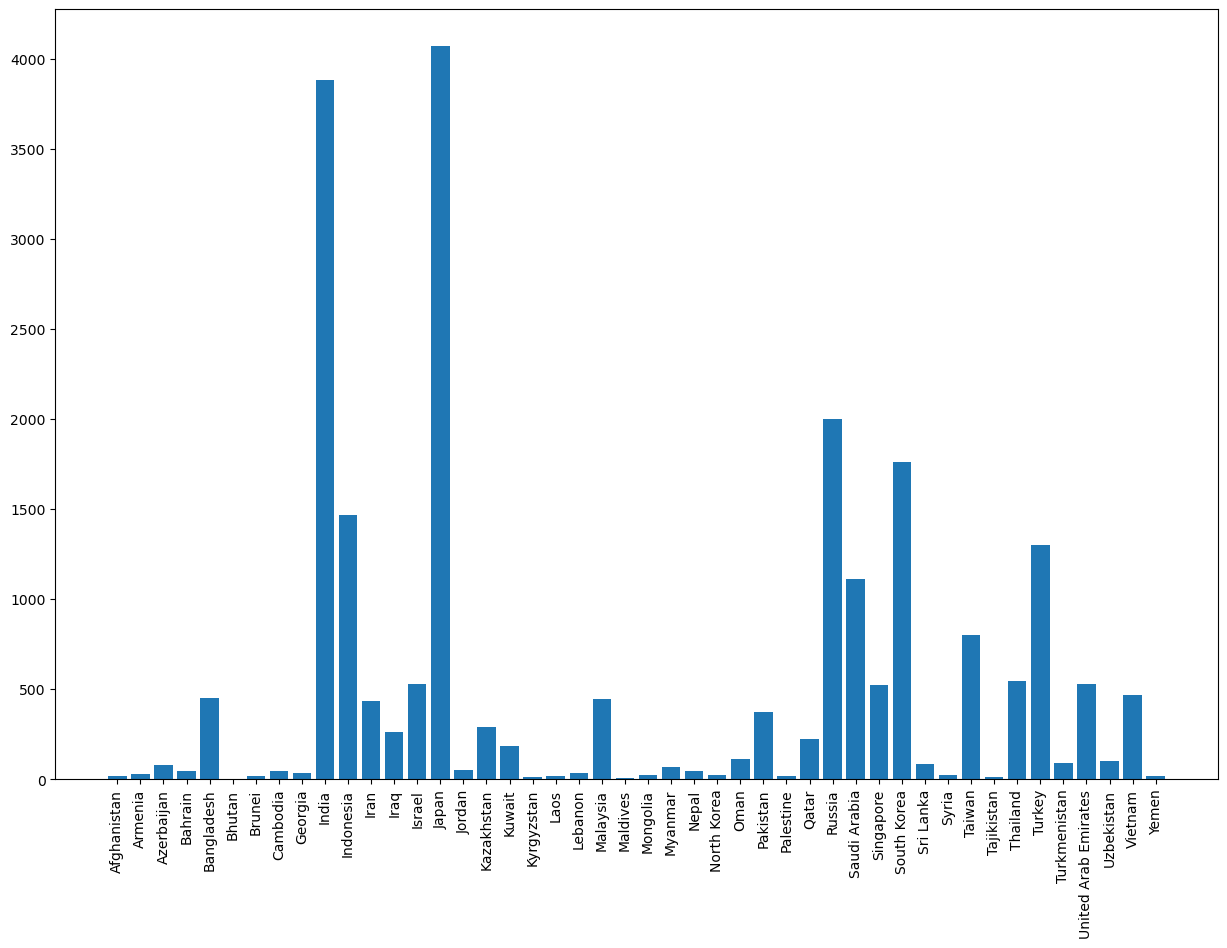

In [46]:
x=finalDf['Country']
y=finalDf[' Final Gdp in billion']
plt.figure(figsize=[15,10])
plt.xticks(rotation=90)
plt.xlabel=['Country']
plt.ylabel=['GDP']
plt.bar(x,y)
plt.show()


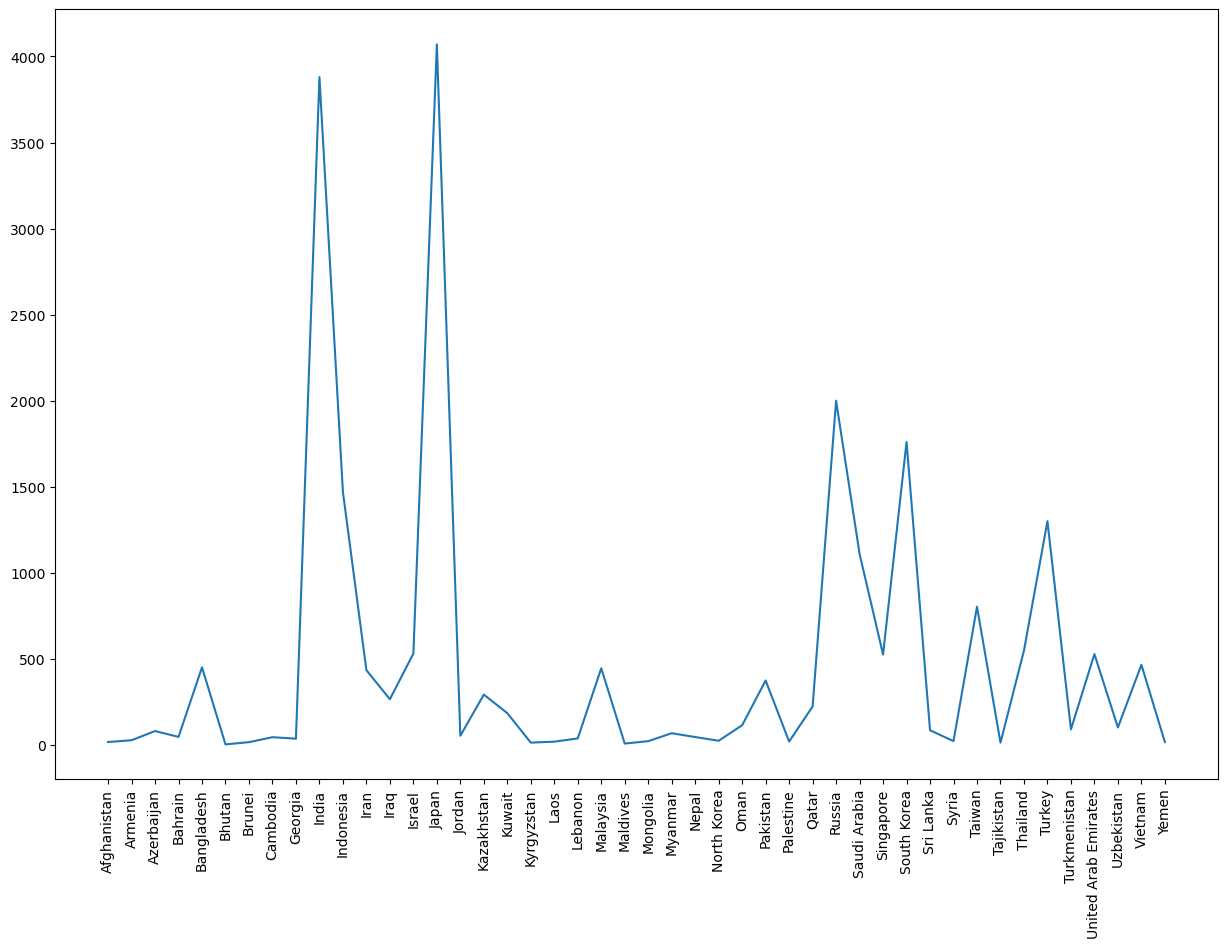

In [47]:
x=finalDf['Country']
y=finalDf[' Final Gdp in billion']
plt.figure(figsize=[15,10])
plt.xticks(rotation=90)
plt.xlabel=['Country']
plt.ylabel=['GDP']
plt.plot(x,y)
plt.show()

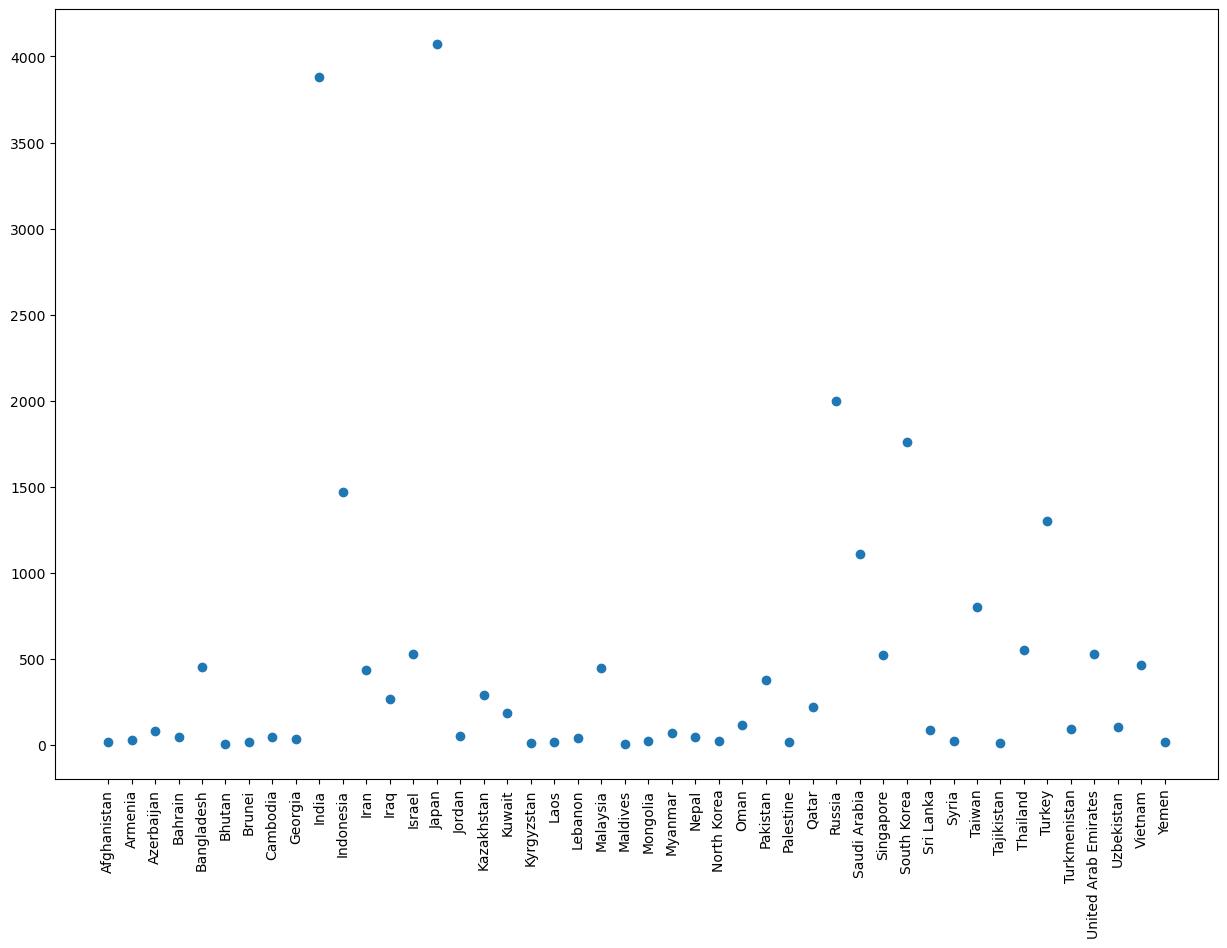

In [48]:
x=finalDf['Country']
y=finalDf[' Final Gdp in billion']
plt.figure(figsize=[15,10])
plt.xticks(rotation=90)
plt.xlabel=['Country']
plt.ylabel=['GDP']
plt.scatter(x,y)
plt.show()

In [49]:
sortedGdpDf=finalDf.sort_values(by=' Final Gdp in billion',ascending=False)
sortedGdpDf

,Country,Capital,Area km2,Population,Regionrank,Gdp in billion,Final Gdp in billion,Gdp per Capita
15,Japan,Tokyo,"377,915",126050804,2,4.07 trillion[3],4070.00,32288.568346
10,India,New Delhi,"3,287,263",1393409038,3,3.88 trillion[4],3880.00,2784.537702
32,Russia,Moscow,"17,098,242",145734038,4,2.0 trillion,2000.00,13723.629891
35,South Korea,Seoul,"100,210",51305186,5,1.76 trillion,1760.00,34304.524303
11,Indonesia,Jakarta,"1,904,569",276361783,6,1.47 trillion,1470.00,5319.114619
41,Turkey,Ankara,"783,562",85042738,7,1.3 trillion,1300.00,15286.431629
33,Saudi Arabia,Riyadh,"2,149,690",35340683,8,1.11 trillion,1110.00,31408.561063
38,Taiwan,Taipei,"36,193",23855010,9,803.0 billion,803.00,33661.692030
40,Thailand,Bangkok,"513,120",69950850,10,548.9 billion,548.90,7846.938243
14,Israel,Jerusalem (disputed),"20,770",8789774,11,530.6 billion,530.60,60365.602119


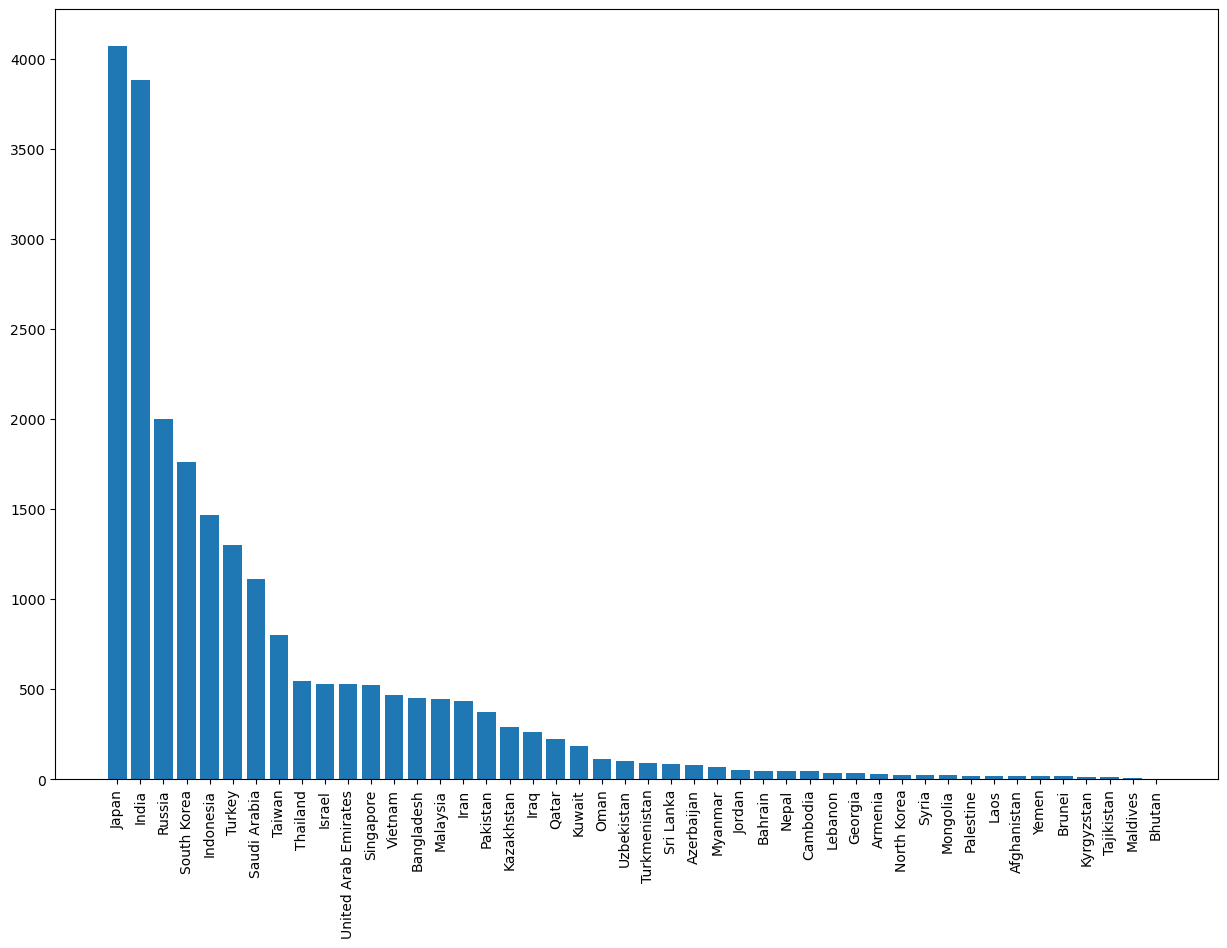

In [50]:
x=sortedGdpDf['Country']
y=sortedGdpDf[' Final Gdp in billion']
plt.figure(figsize=[15,10])
plt.xticks(rotation=90)
plt.xlabel=['Country']
plt.ylabel=['GDP']
plt.bar(x,y)
plt.show()

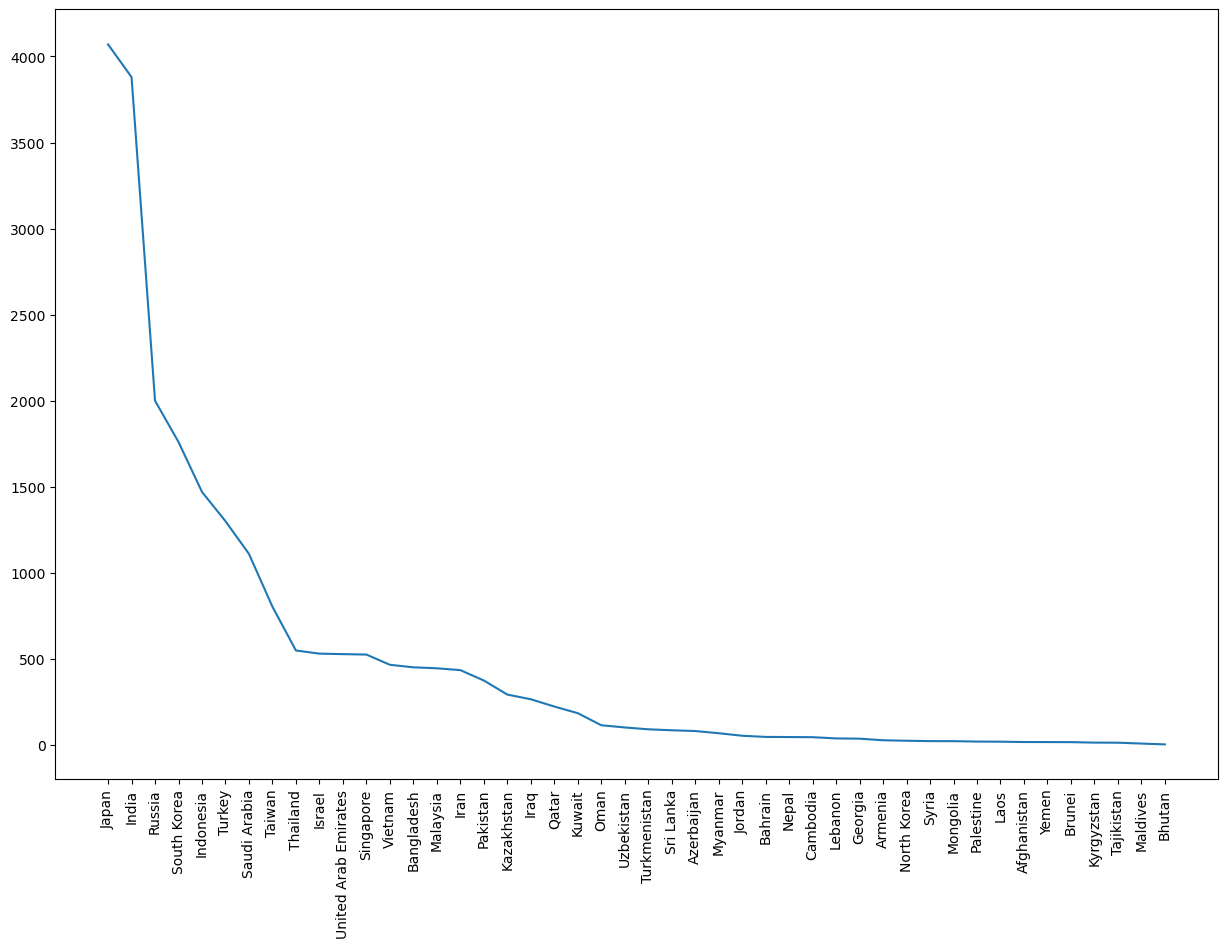

In [51]:
x=sortedGdpDf['Country']
y=sortedGdpDf[' Final Gdp in billion']
plt.figure(figsize=[15,10])
plt.xticks(rotation=90)
plt.xlabel=['Country']
plt.ylabel=['GDP']
plt.plot(x,y)
plt.show()

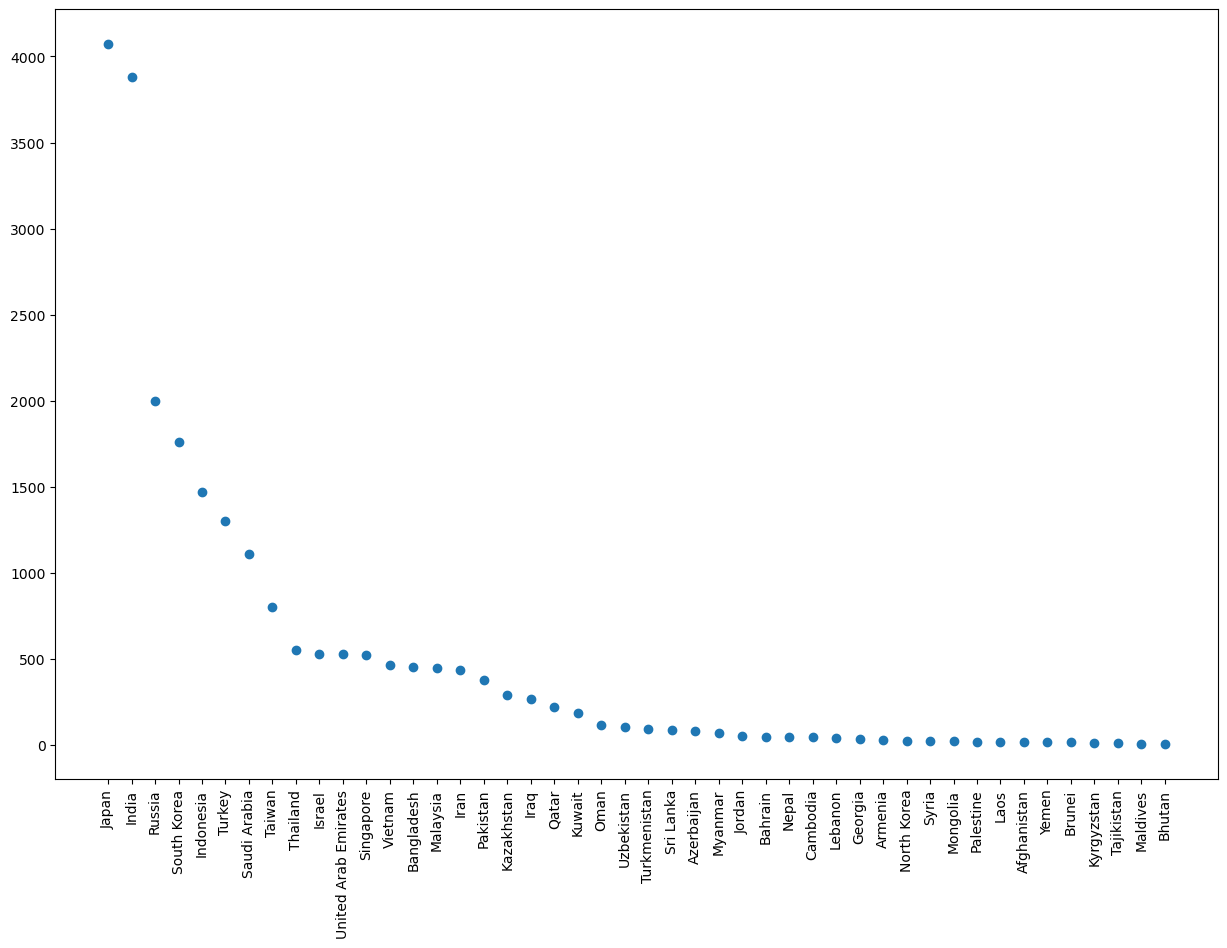

In [52]:
x=sortedGdpDf['Country']
y=sortedGdpDf[' Final Gdp in billion']
plt.figure(figsize=[15,10])
plt.xticks(rotation=90)
plt.xlabel=['Country']
plt.ylabel=['GDP']
plt.scatter(x,y)
plt.show()

In [53]:
sortedGdpDf1=finalDf.sort_values(by='Gdp per Capita',ascending=False)
sortedGdpDf1

,Country,Capital,Area km2,Population,Regionrank,Gdp in billion,Final Gdp in billion,Gdp per Capita
34,Singapore,Singapore,697,5896686,13,525.2 billion,525.20,89066.977621
31,Qatar,Doha,"11,586",2930528,23,223.3 billion,223.30,76197.872875
14,Israel,Jerusalem (disputed),"20,770",8789774,11,530.6 billion,530.60,60365.602119
43,United Arab Emirates,Abu Dhabi,"83,600",9991089,12,527.8 billion,527.80,52827.074206
18,Kuwait,Kuwait City,"17,818",4328550,24,184.8 billion,184.80,42693.280660
7,Brunei,Bandar Seri Begawan,"5,765",441532,47,16.4 billion,16.40,37143.400705
35,South Korea,Seoul,"100,210",51305186,5,1.76 trillion,1760.00,34304.524303
38,Taiwan,Taipei,"36,193",23855010,9,803.0 billion,803.00,33661.692030
15,Japan,Tokyo,"377,915",126050804,2,4.07 trillion[3],4070.00,32288.568346
33,Saudi Arabia,Riyadh,"2,149,690",35340683,8,1.11 trillion,1110.00,31408.561063


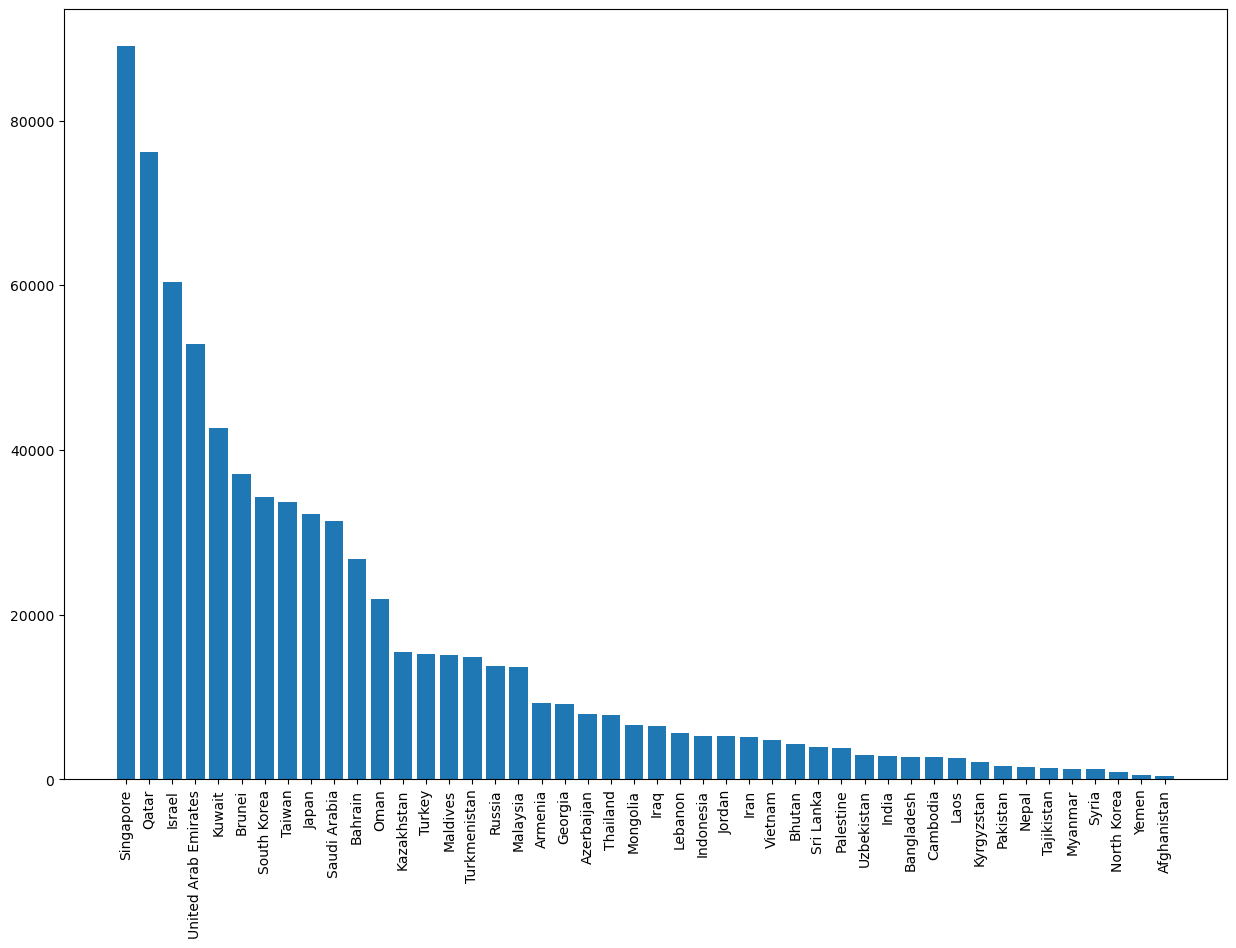

In [54]:
x=sortedGdpDf1['Country']
y=sortedGdpDf1['Gdp per Capita']
plt.figure(figsize=[15,10])
plt.xticks(rotation=90)
plt.xlabel=['Country']
plt.ylabel=['GDP']
plt.bar(x,y)
plt.show()

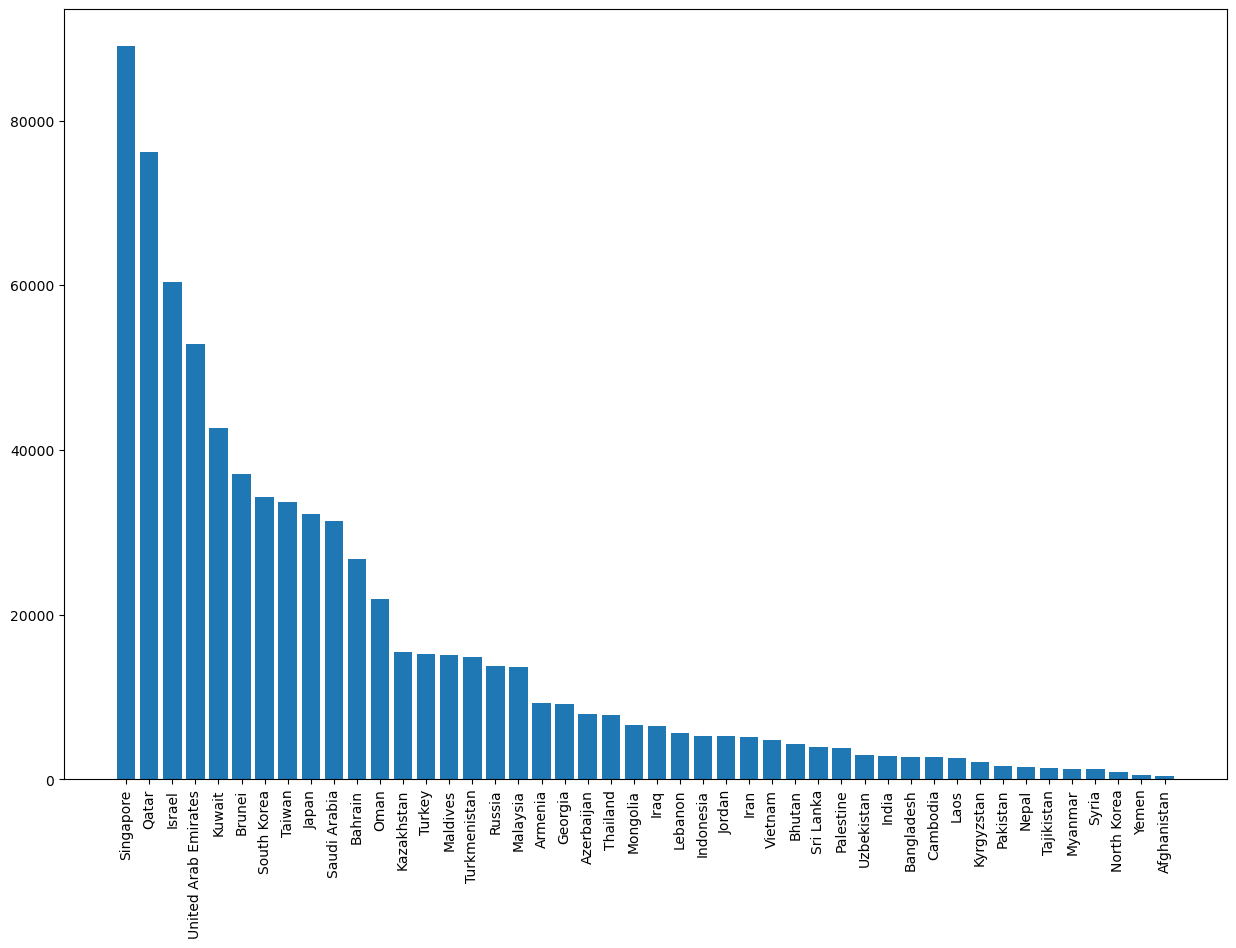

In [55]:
x=sortedGdpDf1['Country']
y=sortedGdpDf1['Gdp per Capita']
plt.figure(figsize=[15,10])
plt.xticks(rotation=90)
plt.xlabel=['Country']
plt.ylabel=['GDP']
plt.bar(x,y)
plt.show()

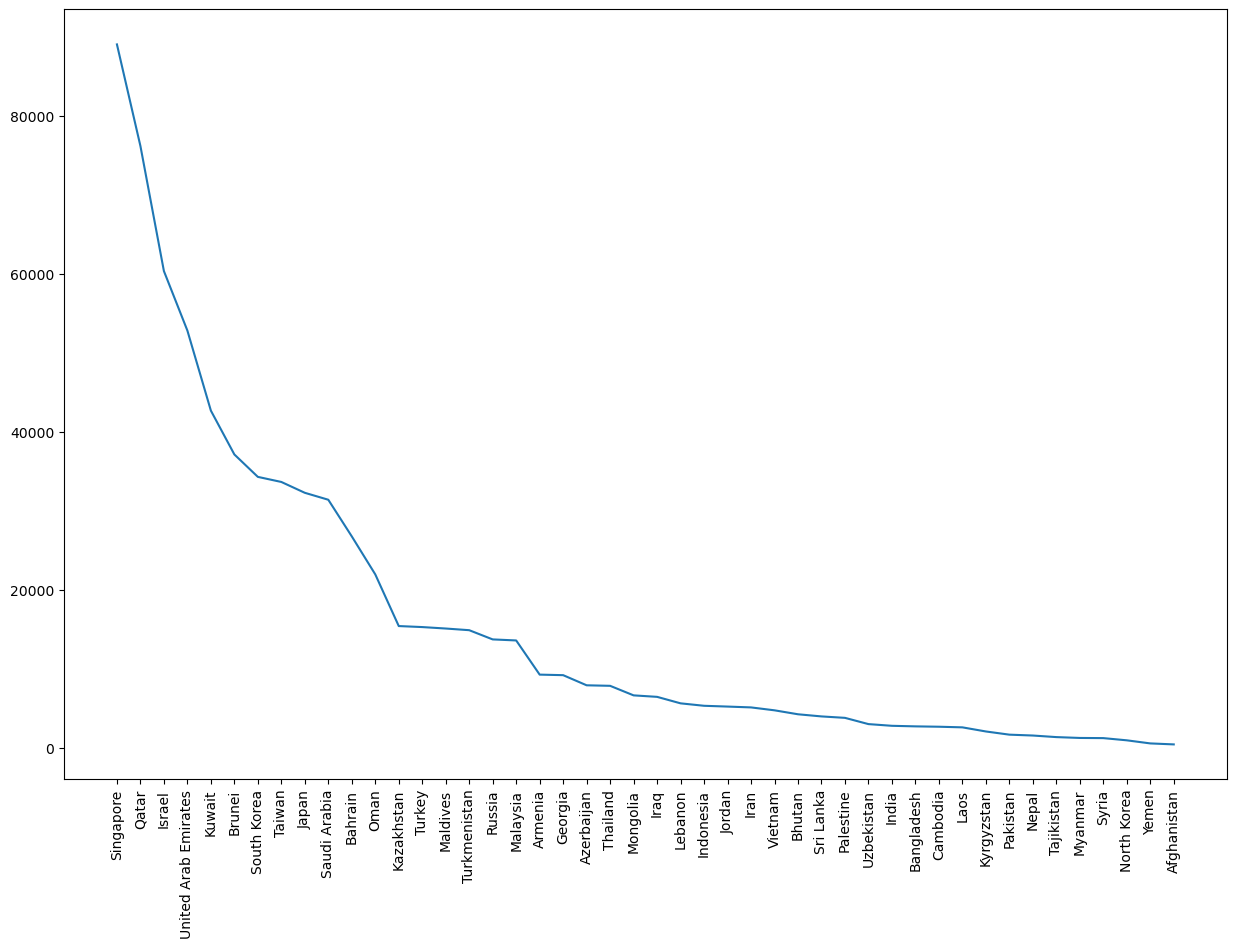

In [56]:
x=sortedGdpDf1['Country']
y=sortedGdpDf1['Gdp per Capita']
plt.figure(figsize=[15,10])
plt.xticks(rotation=90)
plt.xlabel=['Country']
plt.ylabel=['GDP']
plt.plot(x,y)
plt.show()

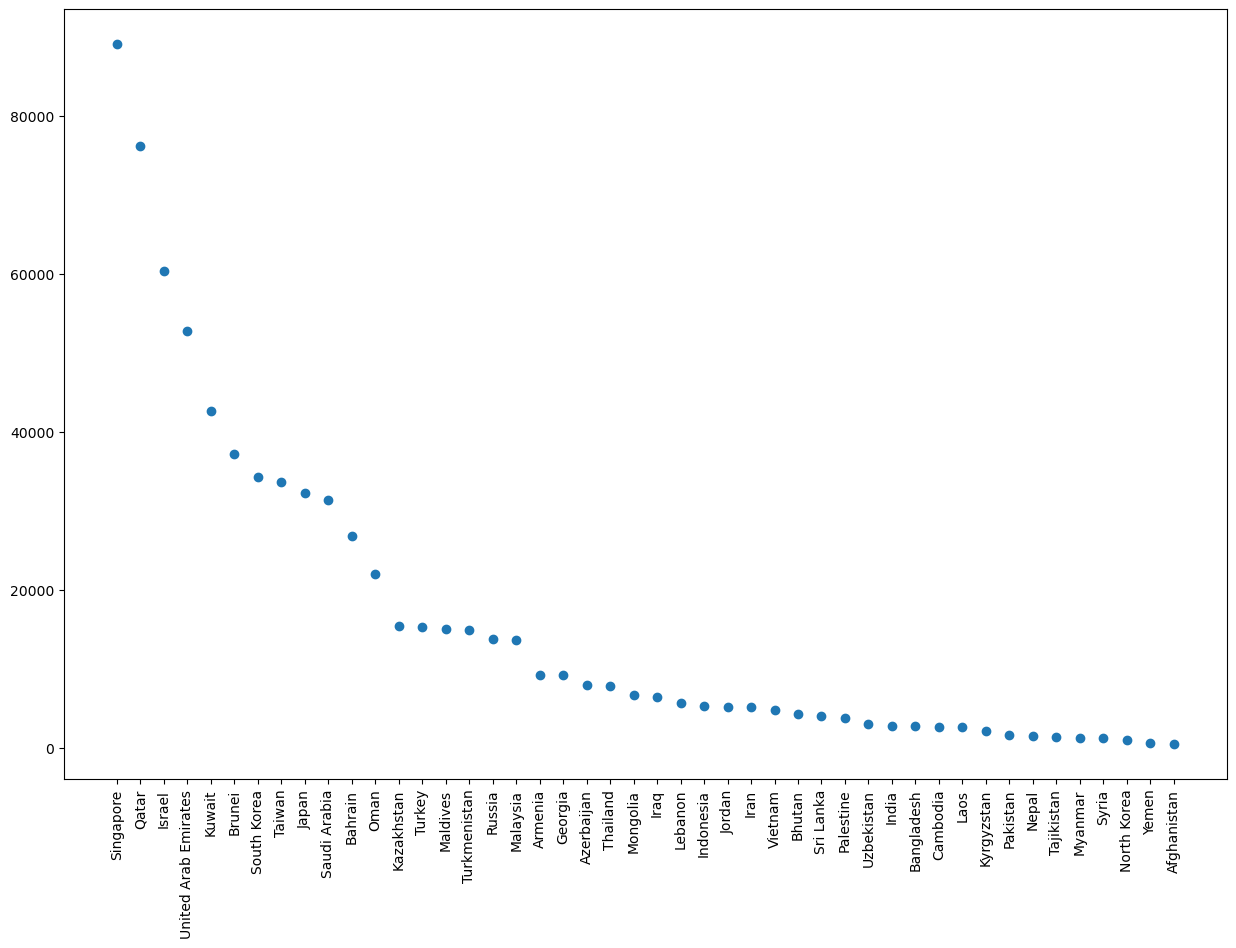

In [57]:
x=sortedGdpDf1['Country']
y=sortedGdpDf1['Gdp per Capita']
plt.figure(figsize=[15,10])
plt.xticks(rotation=90)
plt.xlabel=['Country']
plt.ylabel=['GDP']
plt.scatter(x,y)
plt.show()